In [1]:
import sys
from rdflib import Graph
from rdflib.namespace import RDF
import copy

sys.path.append('../')
sys.path.append('../andre')
import andre.utils as utils
from andre.book_alignment import BookAlignment
import andre.interdbstats_exact as interdbstats_exact

In [2]:
stats_logger = utils.setup_logger('stats_logger', f'exact_stats.log')
stats_isbn = interdbstats_exact.InterDbStatsExact(key_type="isbn", stats_logger=stats_logger)

In [3]:
g = Graph()
g.parse("../final_datasets/constellations.ttl", format="turtle")

<Graph identifier=N1d1f7e66176b4d3397f8684cfef4475c (<class 'rdflib.graph.Graph'>)>

In [4]:
for book in g.subjects(RDF.type, utils.schema.Book):
    book_data = utils.extract_data_constellation(g, book)
    book_alignment_constellation = BookAlignment(url_constellation=book_data.url,
                                                 isbn_constellation=book_data.isbn,
                                                 age_range_constellation=book_data.age_range_int,
                                                 name=book_data.book_name,  # put non preprocessed name
                                                 author=book_data.book_author,
                                                 publisher=book_data.publisher,
                                                 date=book_data.publication_date,
                                                 uri_constellation=book_data.uri)
    stats_isbn.all_book_alignments[book_data.isbn] = copy.deepcopy(book_alignment_constellation)
    stats_isbn.increment_constellation_book_number()

In [5]:
g = Graph()
g.parse("../final_datasets/bnf.ttl", format="turtle")

<Graph identifier=N25d8ca150d094711afae504dd7497616 (<class 'rdflib.graph.Graph'>)>

In [9]:
for book in g.subjects(RDF.type, utils.schema.Book):  # O(M)
    book_data = utils.extract_data_bnf(g, book)
    book_alignment_bnf = BookAlignment(url_bnf=book_data.url,
                                       isbn_bnf=book_data.isbn,
                                       ean_bnf=book_data.ean,
                                       age_range_bnf=book_data.age_range_int,
                                       uri_bnf=book_data.uri,
                                       name=book_data.book_name,  # non preprocessed name
                                       author=book_data.book_author,
                                       publisher=book_data.publisher,
                                       date=book_data.publication_date)
    stats_isbn.align_by_ean_isbn(copy.deepcopy(book_alignment_bnf), book_data.isbn, book_data.ean)
    stats_isbn.increment_bnf_book_number()


In [7]:
g = Graph()
g.parse("../final_datasets/btlf_books/Graphes/grapheLivres.ttl", format="turtle")

<Graph identifier=N7c1ed75552634528a1ab6274337e7768 (<class 'rdflib.graph.Graph'>)>

In [8]:
btlf_books = []
for book in g.subjects(RDF.type, utils.btlf_classe.Livre):  # O(M)
    
    book_data = utils.extract_data_btlf(g, book)
    btlf_books.append(book_data)
    if book_data.isbn == "9782742769681":
        print("a")
    stats_isbn.align_btlf(copy.deepcopy(book_data), book_data.isbn)
    


a


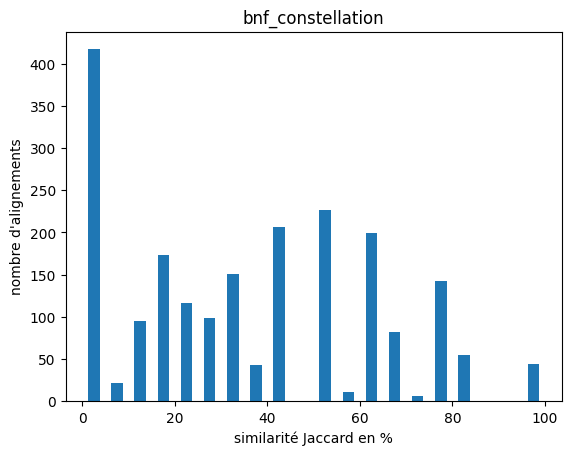

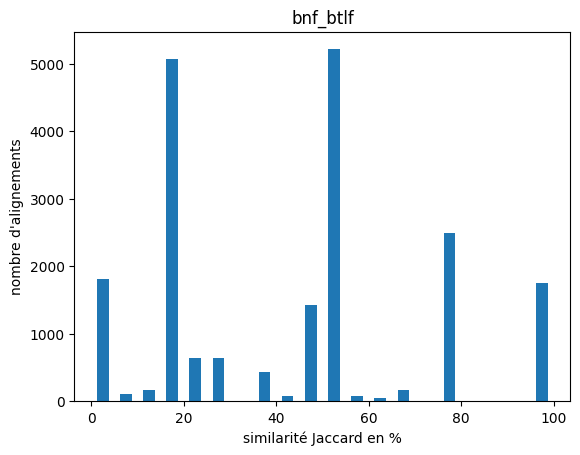

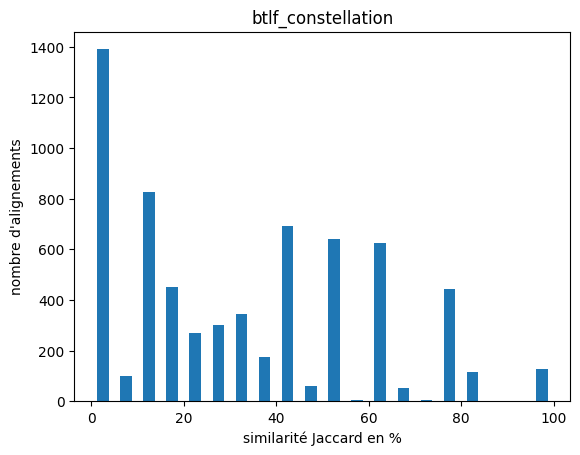

In [10]:
stats_isbn.plot_age_similarities_histograms()

In [ ]:
stats_isbn.output_csv_constellation_bnf_btlf()